In [3]:
import calendar
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')
df.info(), df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


(None,
              value
 date              
 2016-05-09    1201
 2016-05-10    2329
 2016-05-11    1716
 2016-05-12   10539
 2016-05-13    6933
 ...            ...
 2019-11-29  171584
 2019-11-30  141161
 2019-12-01  142918
 2019-12-02  220144
 2019-12-03  158549
 
 [1304 rows x 1 columns])

In [5]:
# Clean data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df_cleaned = df[(df['value'] >= df['value'].quantile(0.025)) & 
               (df['value'] <= df['value'].quantile(0.975))]
df_cleaned

value
date              
2016-05-19   19736
2016-05-26   18060
2016-05-27   19997
2016-05-28   19044
2016-05-29   20325
...            ...
2019-11-24  138875
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-03  158549

[1238 rows x 1 columns]

In [6]:
x = df_cleaned.index.values
x

array(['2016-05-19T00:00:00.000000000', '2016-05-26T00:00:00.000000000',
       '2016-05-27T00:00:00.000000000', ...,
       '2019-11-30T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2019-12-03T00:00:00.000000000'], dtype='datetime64[ns]')

In [7]:
y = df_cleaned.values.flatten()
y

array([ 19736,  18060,  19997, ..., 141161, 142918, 158549], dtype=int64)

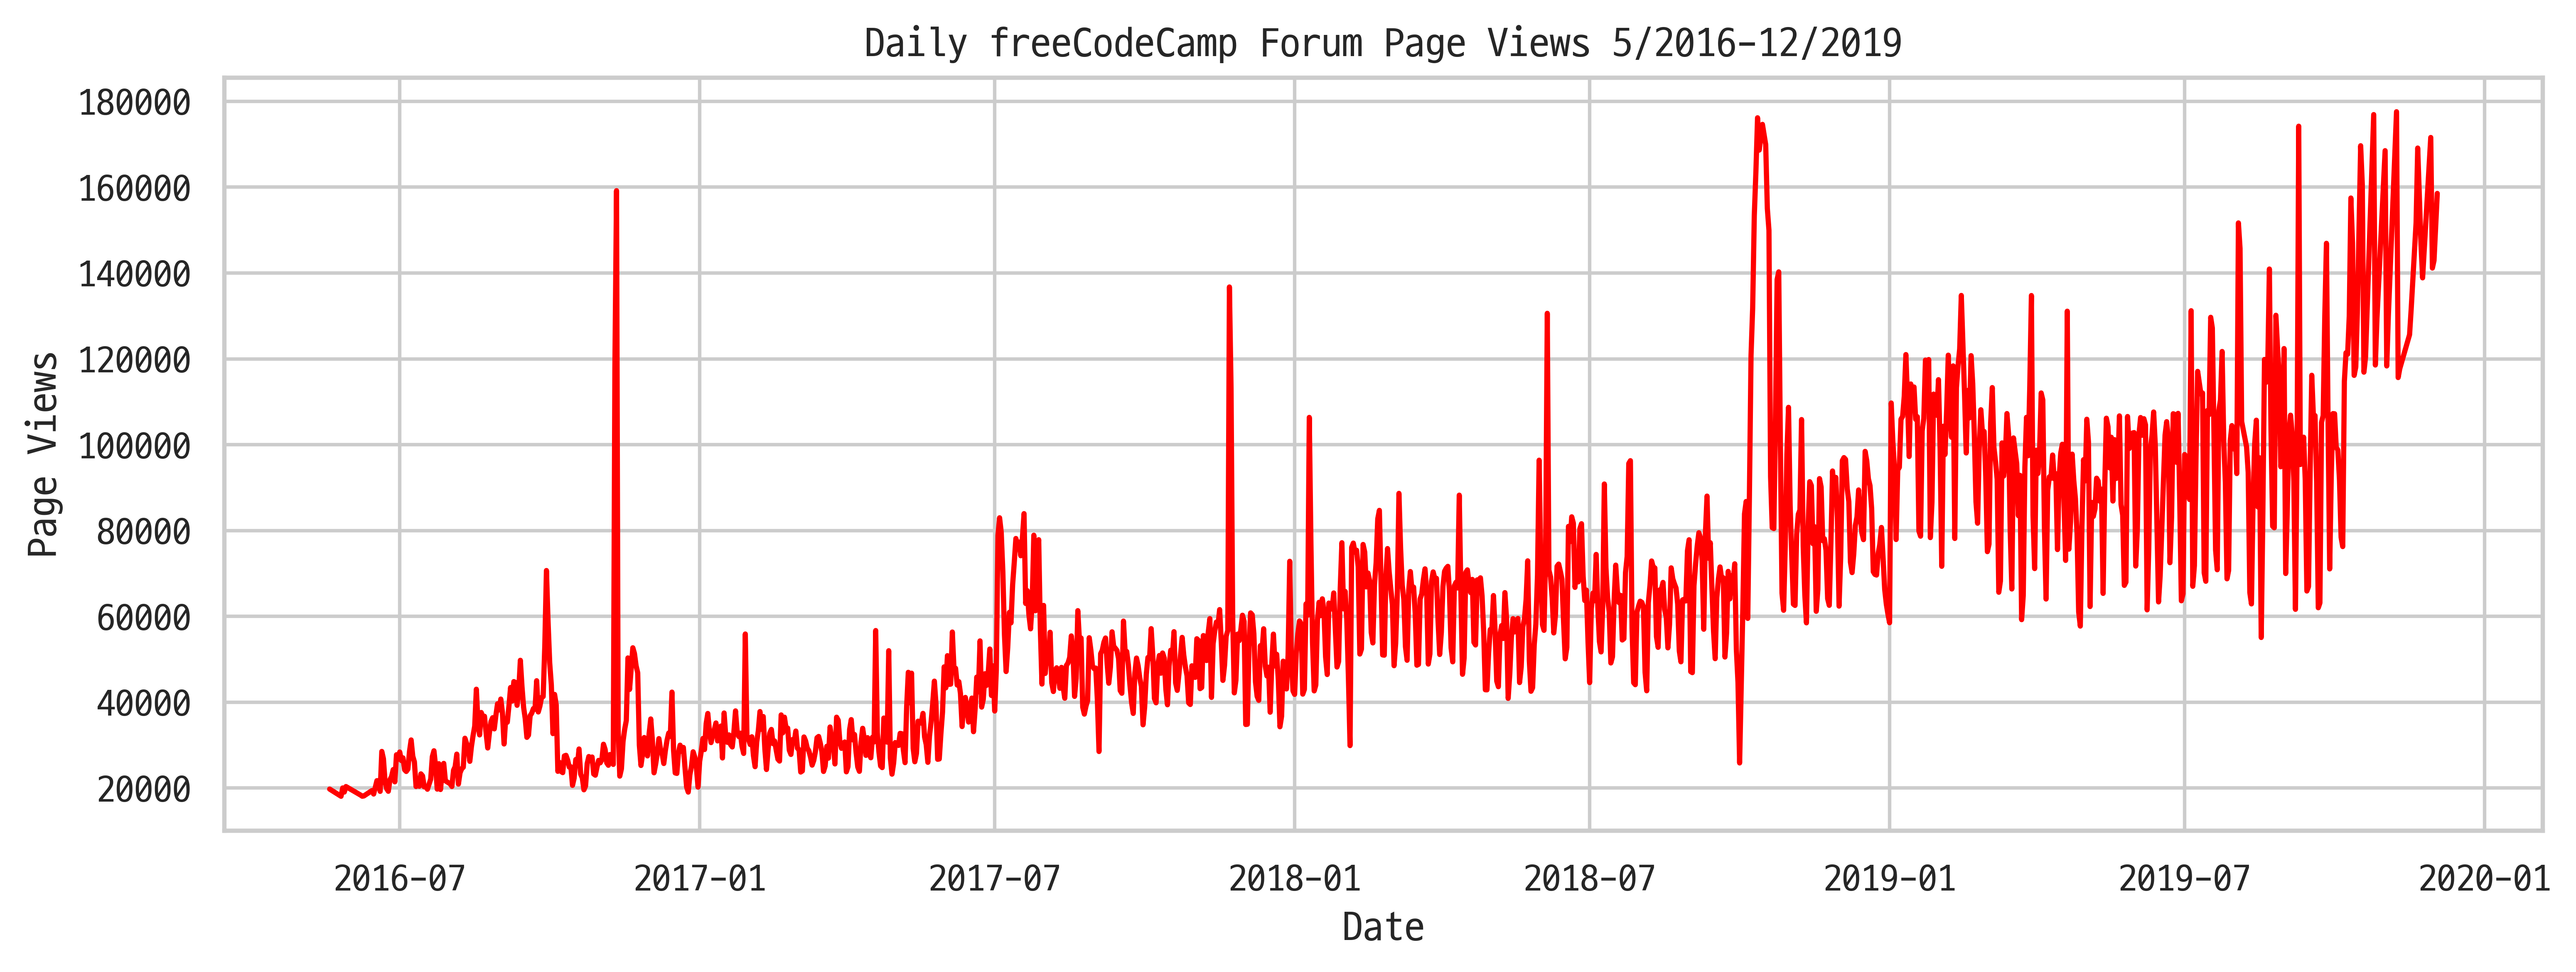

In [8]:
plt.figure(figsize=(12, 4))
plt.plot(x, y, ls='-', color='red')
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.show()

In [9]:
def draw_line_plot():
    # Draw line plot similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019".
    # The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

    x = df_cleaned.index.values
    y = df_cleaned.values.flatten()
    
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(x, y, ls='-', color='red')
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

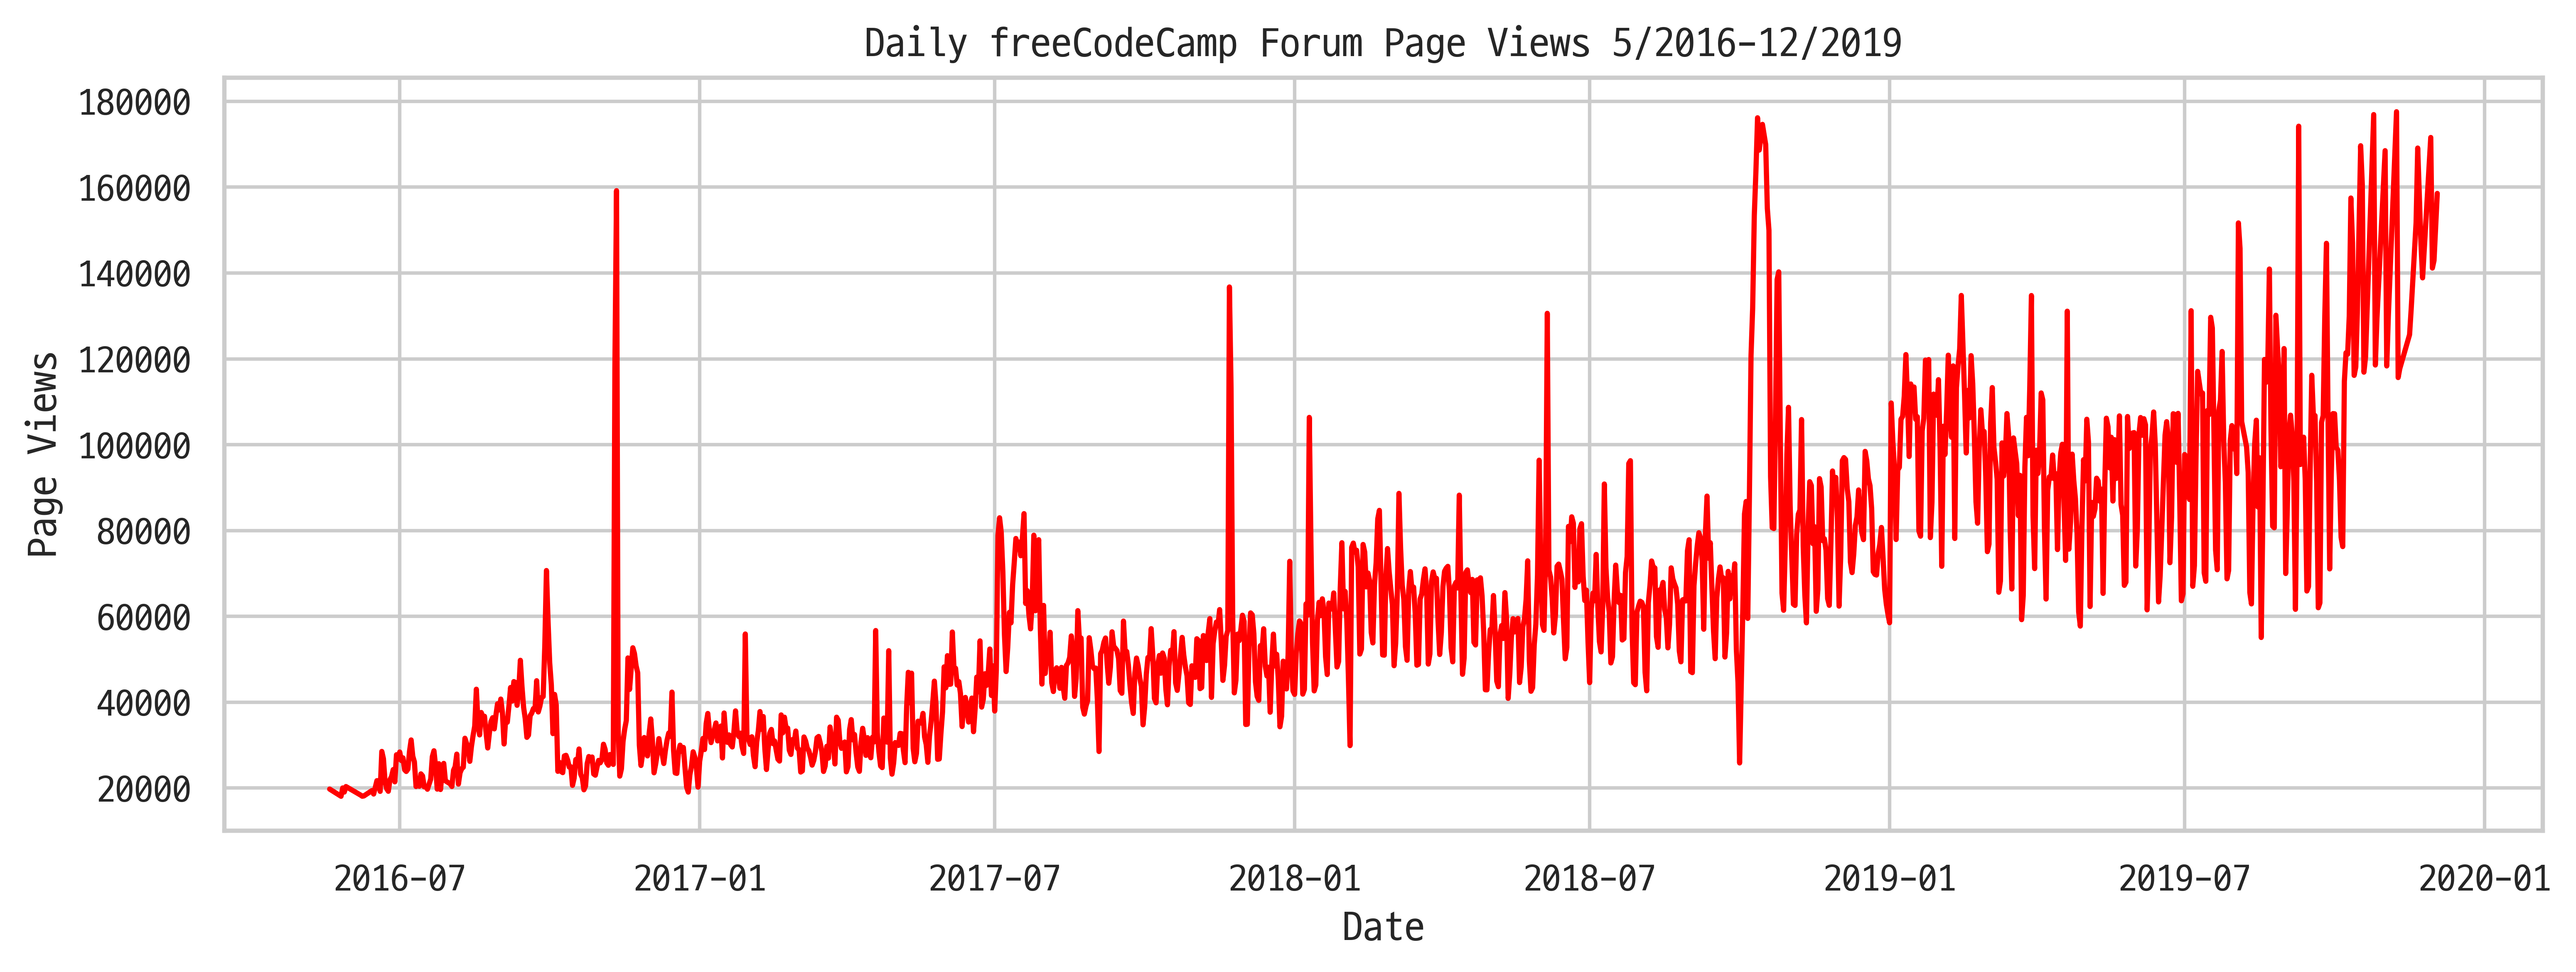

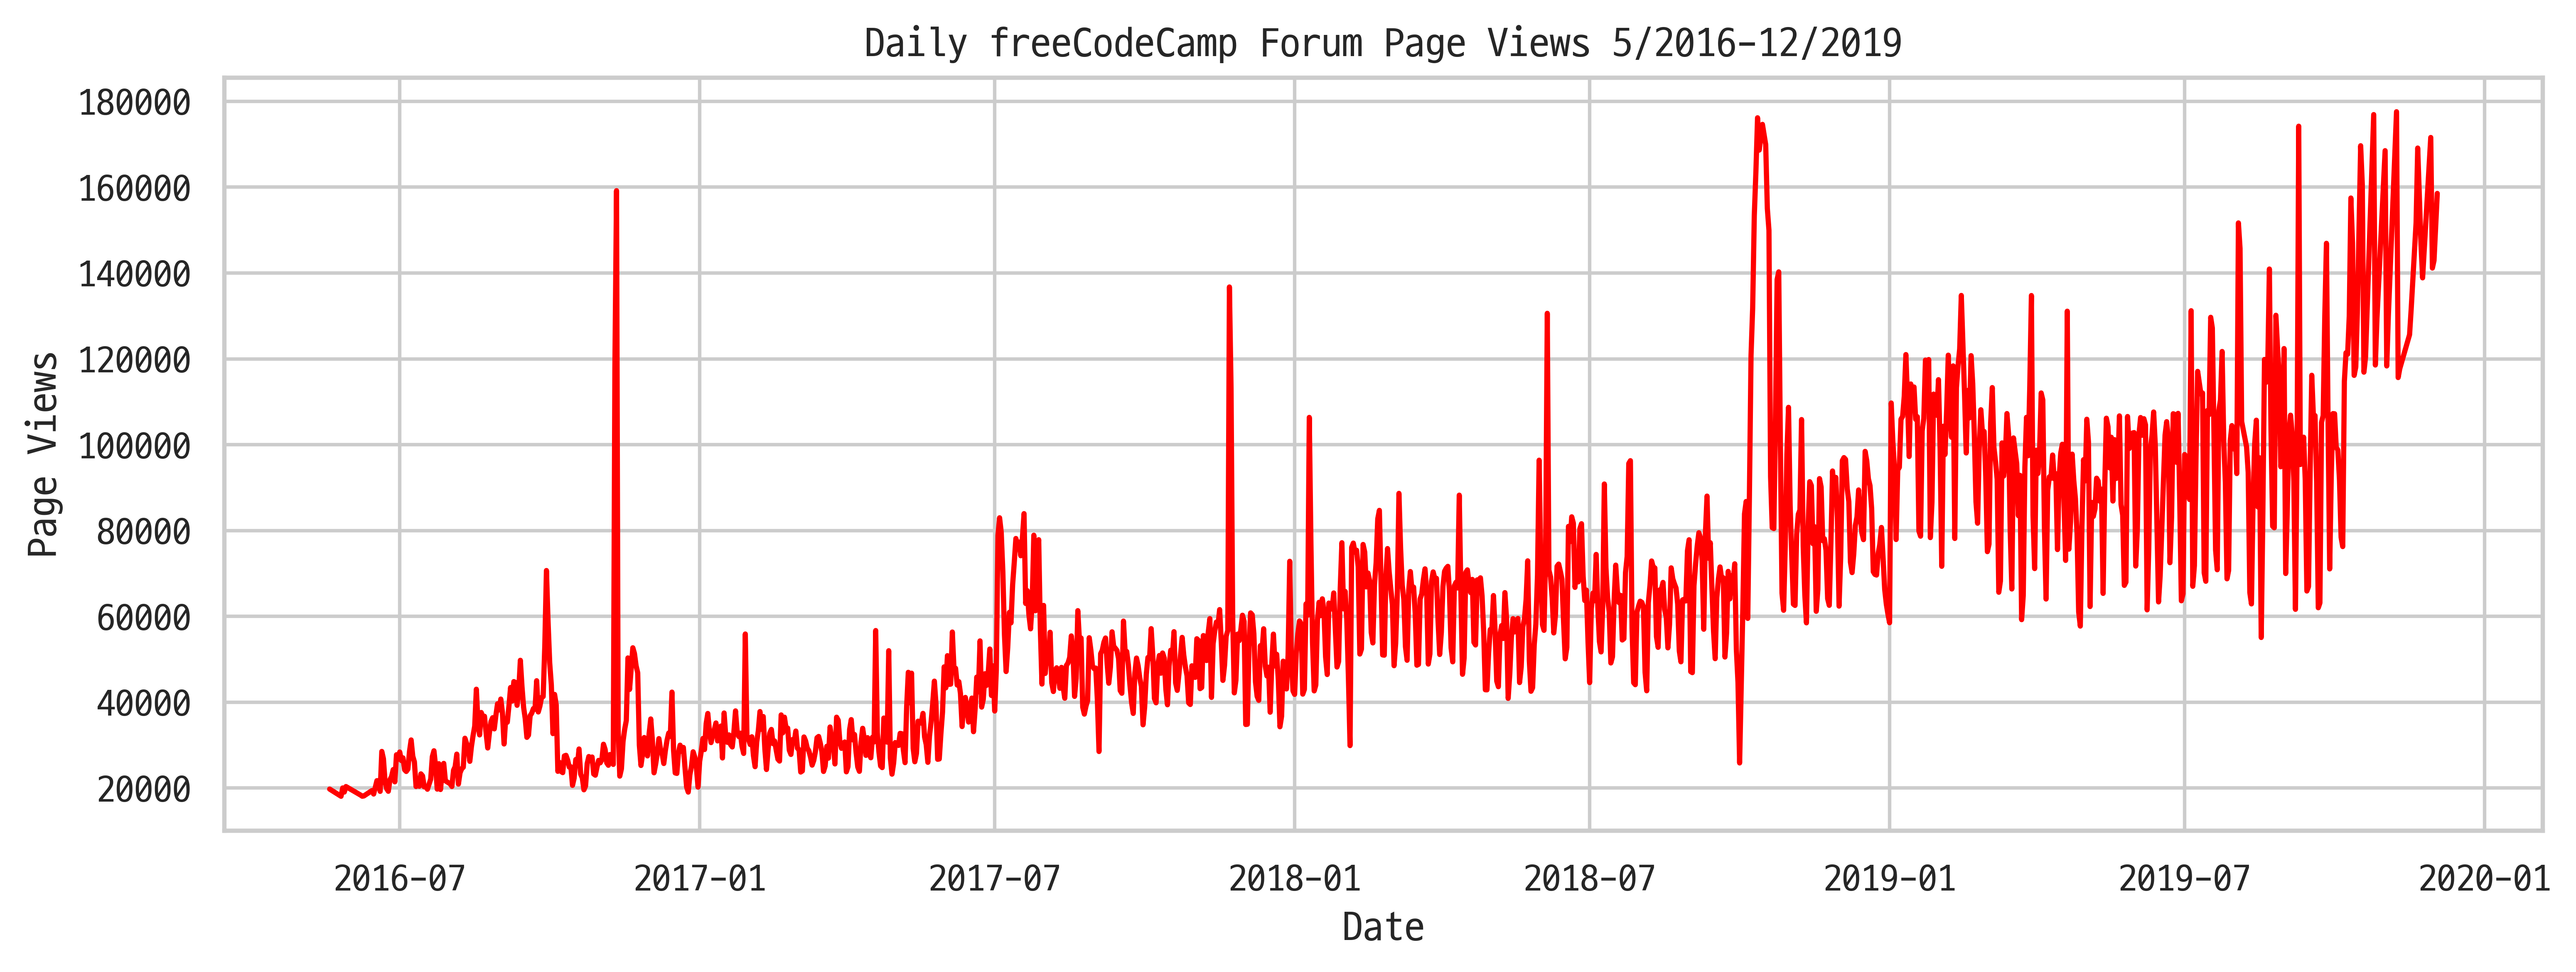

In [10]:
draw_line_plot()

In [11]:
df_bar = df_cleaned.groupby(by=[df_cleaned.index.year, df_cleaned.index.month]).mean()
df_bar.index.names = ['year', 'month']
df_bar.reset_index(inplace=True)
df_bar['Months'] = df_bar['month'].apply(lambda x: calendar.month_name[x])
df_bar

year  month          value     Months
0   2016      5   19432.400000        May
1   2016      6   21875.105263       June
2   2016      7   24109.678571       July
3   2016      8   31049.193548     August
4   2016      9   41476.866667  September
5   2016     10   27398.322581    October
6   2016     11   40448.633333   November
7   2016     12   27832.419355   December
8   2017      1   32785.161290    January
9   2017      2   31113.071429   February
10  2017      3   29369.096774      March
11  2017      4   30878.733333      April
12  2017      5   34244.290323        May
13  2017      6   43577.500000       June
14  2017      7   65806.838710       July
15  2017      8   47712.451613     August
16  2017      9   47376.800000  September
17  2017     10   47438.709677    October
18  2017     11   57701.566667   November
19  2017     12   48420.580645   December
20  2018      1   58580.096774    January
21  2018      2   65679.000000   February
22  2018      3   62693.774194      March
23  2018      4   62350.833333      April
24  2018      5   56562.870968        May
25  2018      6   70117.000000       June
26  2018      7   63591.064516       July
27  2018      8   62831.612903     August
28  2018      9   65941.733333  September
29  2018     10  111378.142857    October
30  2018     11   78688.333333   November
31  2018     12   80047.483871   December
32  2019      1  102056.516129    January
33  2019      2  105968.357143   February
34  2019      3   91214.483871      March
35  2019      4   89368.433333      April
36  2019      5   91439.903226        May
37  2019      6   90435.642857       June
38  2019      7   97236.566667       July
39  2019      8  102717.310345     August
40  2019      9   97268.833333  September
41  2019     10  122802.272727    October
42  2019     11  143166.428571   November
43  2019     12  150733.500000   December

In [12]:
x = df_bar.index
x

RangeIndex(start=0, stop=44, step=1)

In [13]:
y = df_bar.values.flatten()
y.shape

(176,)

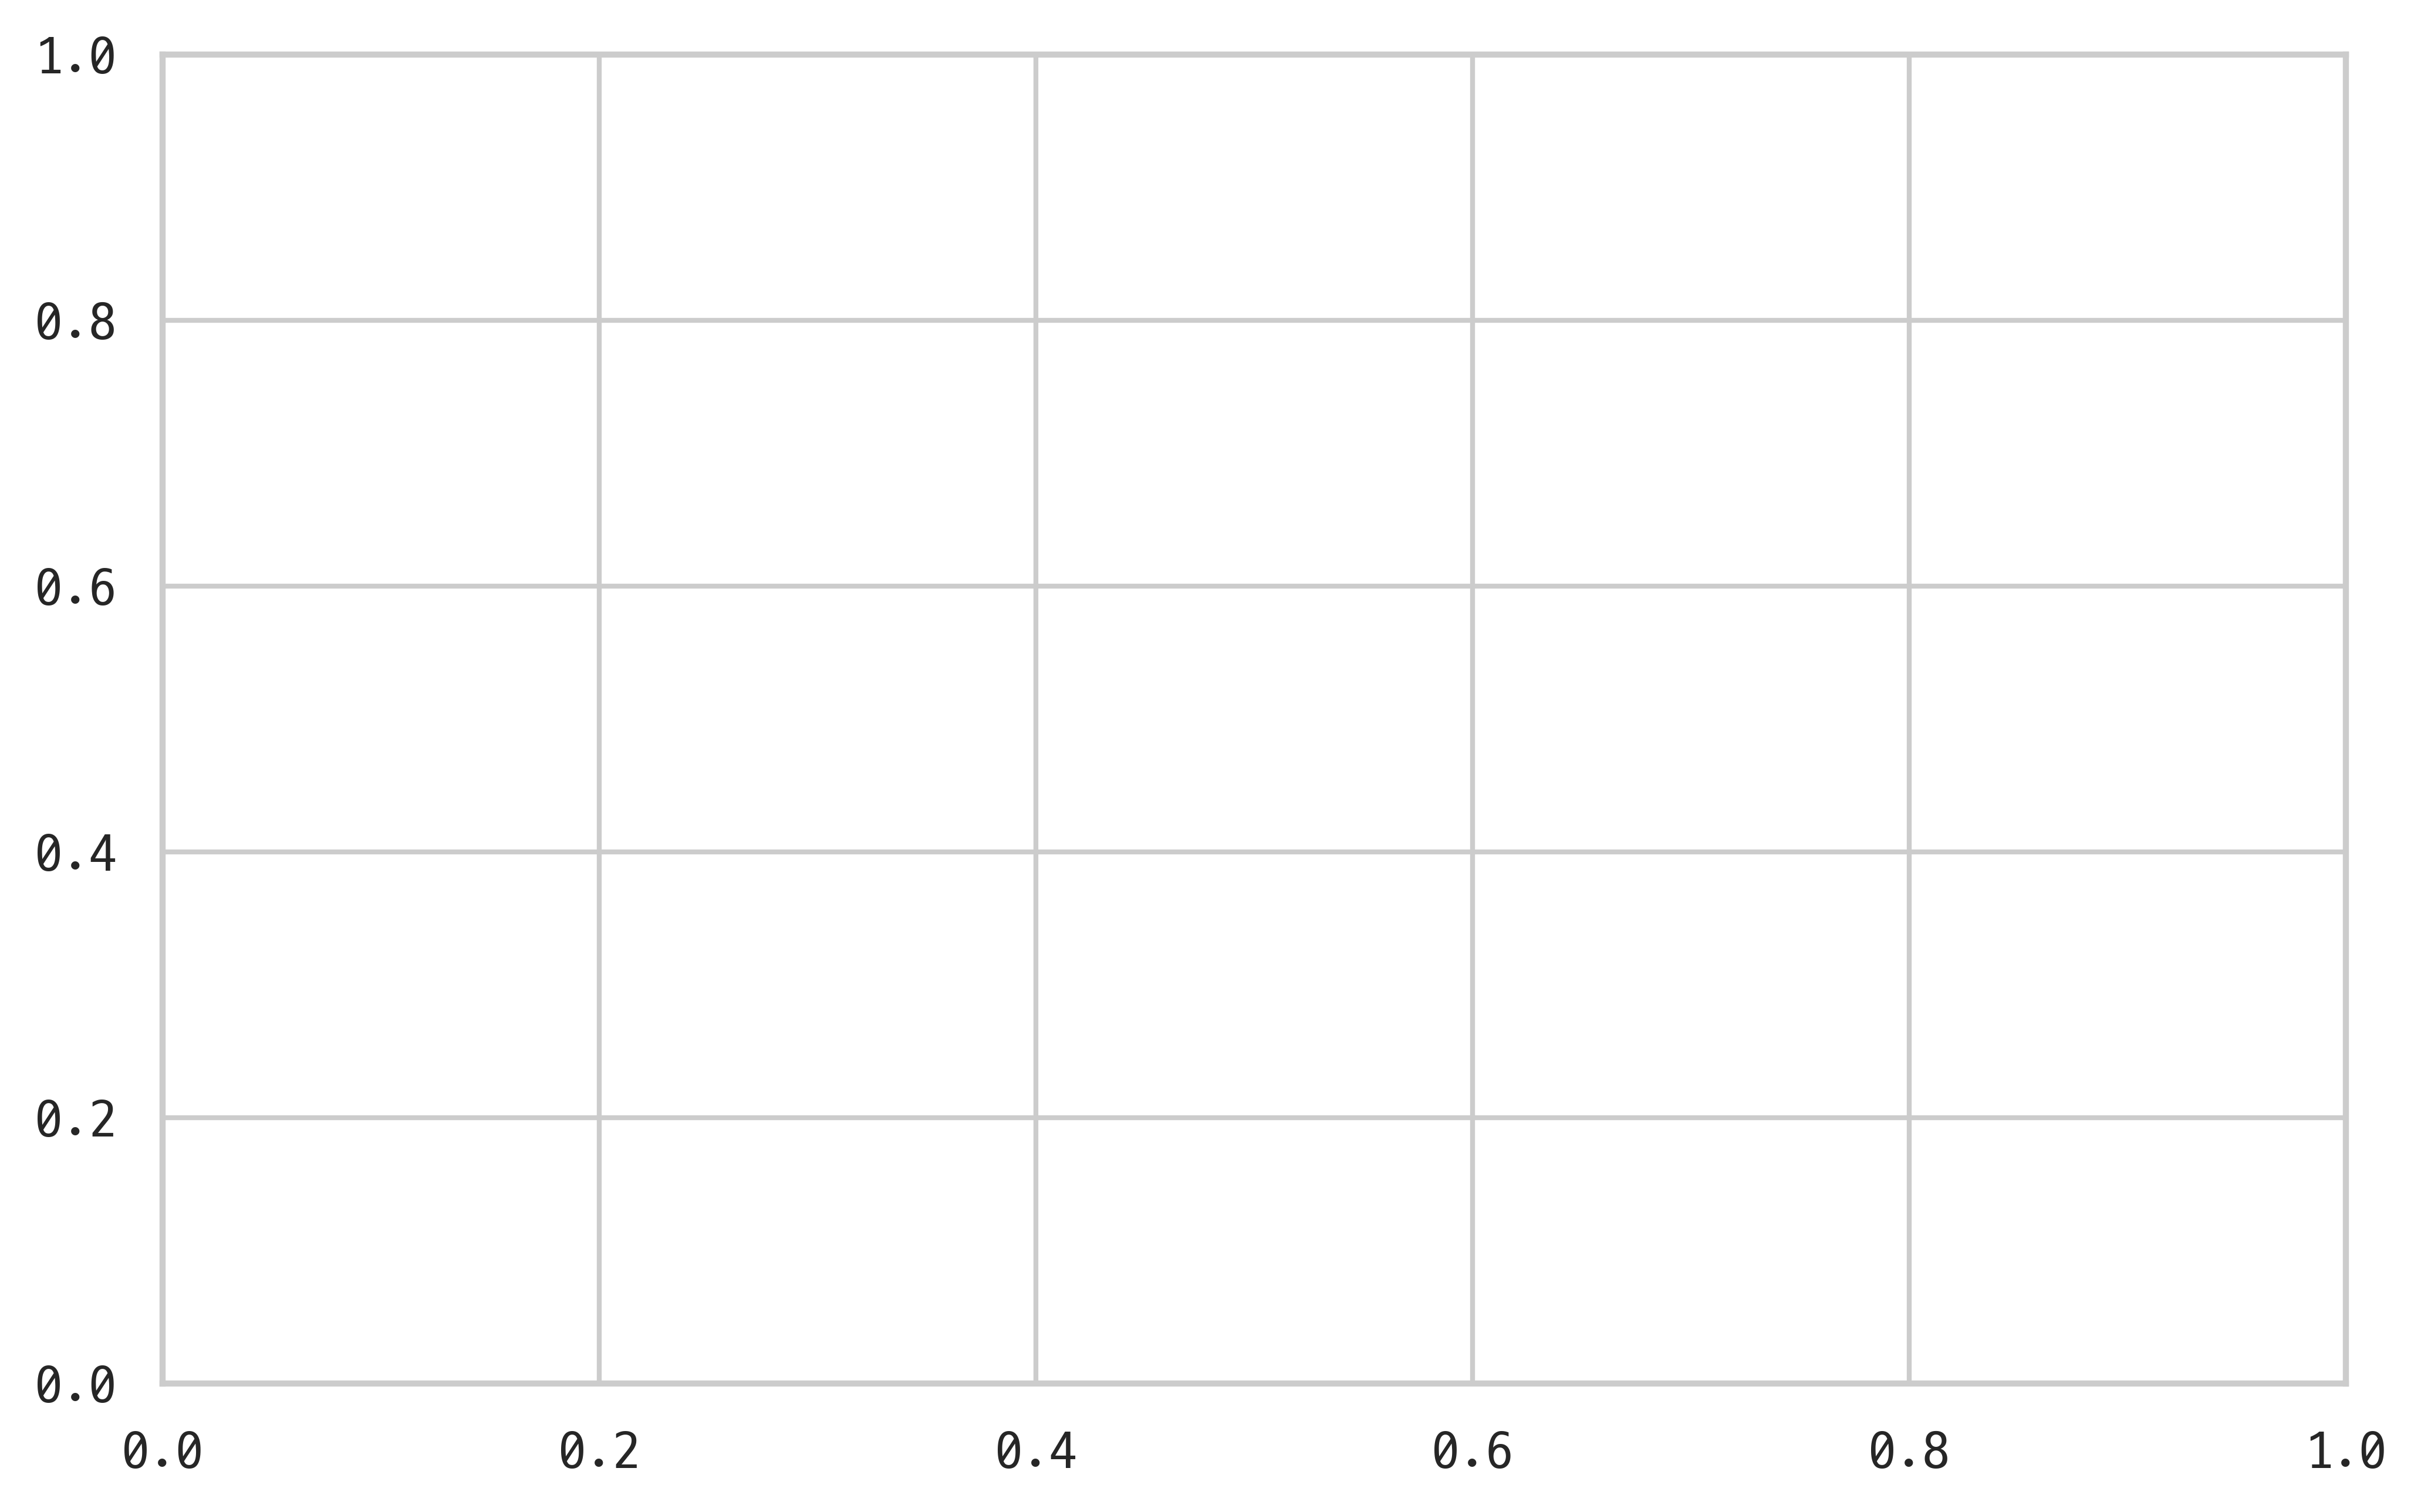

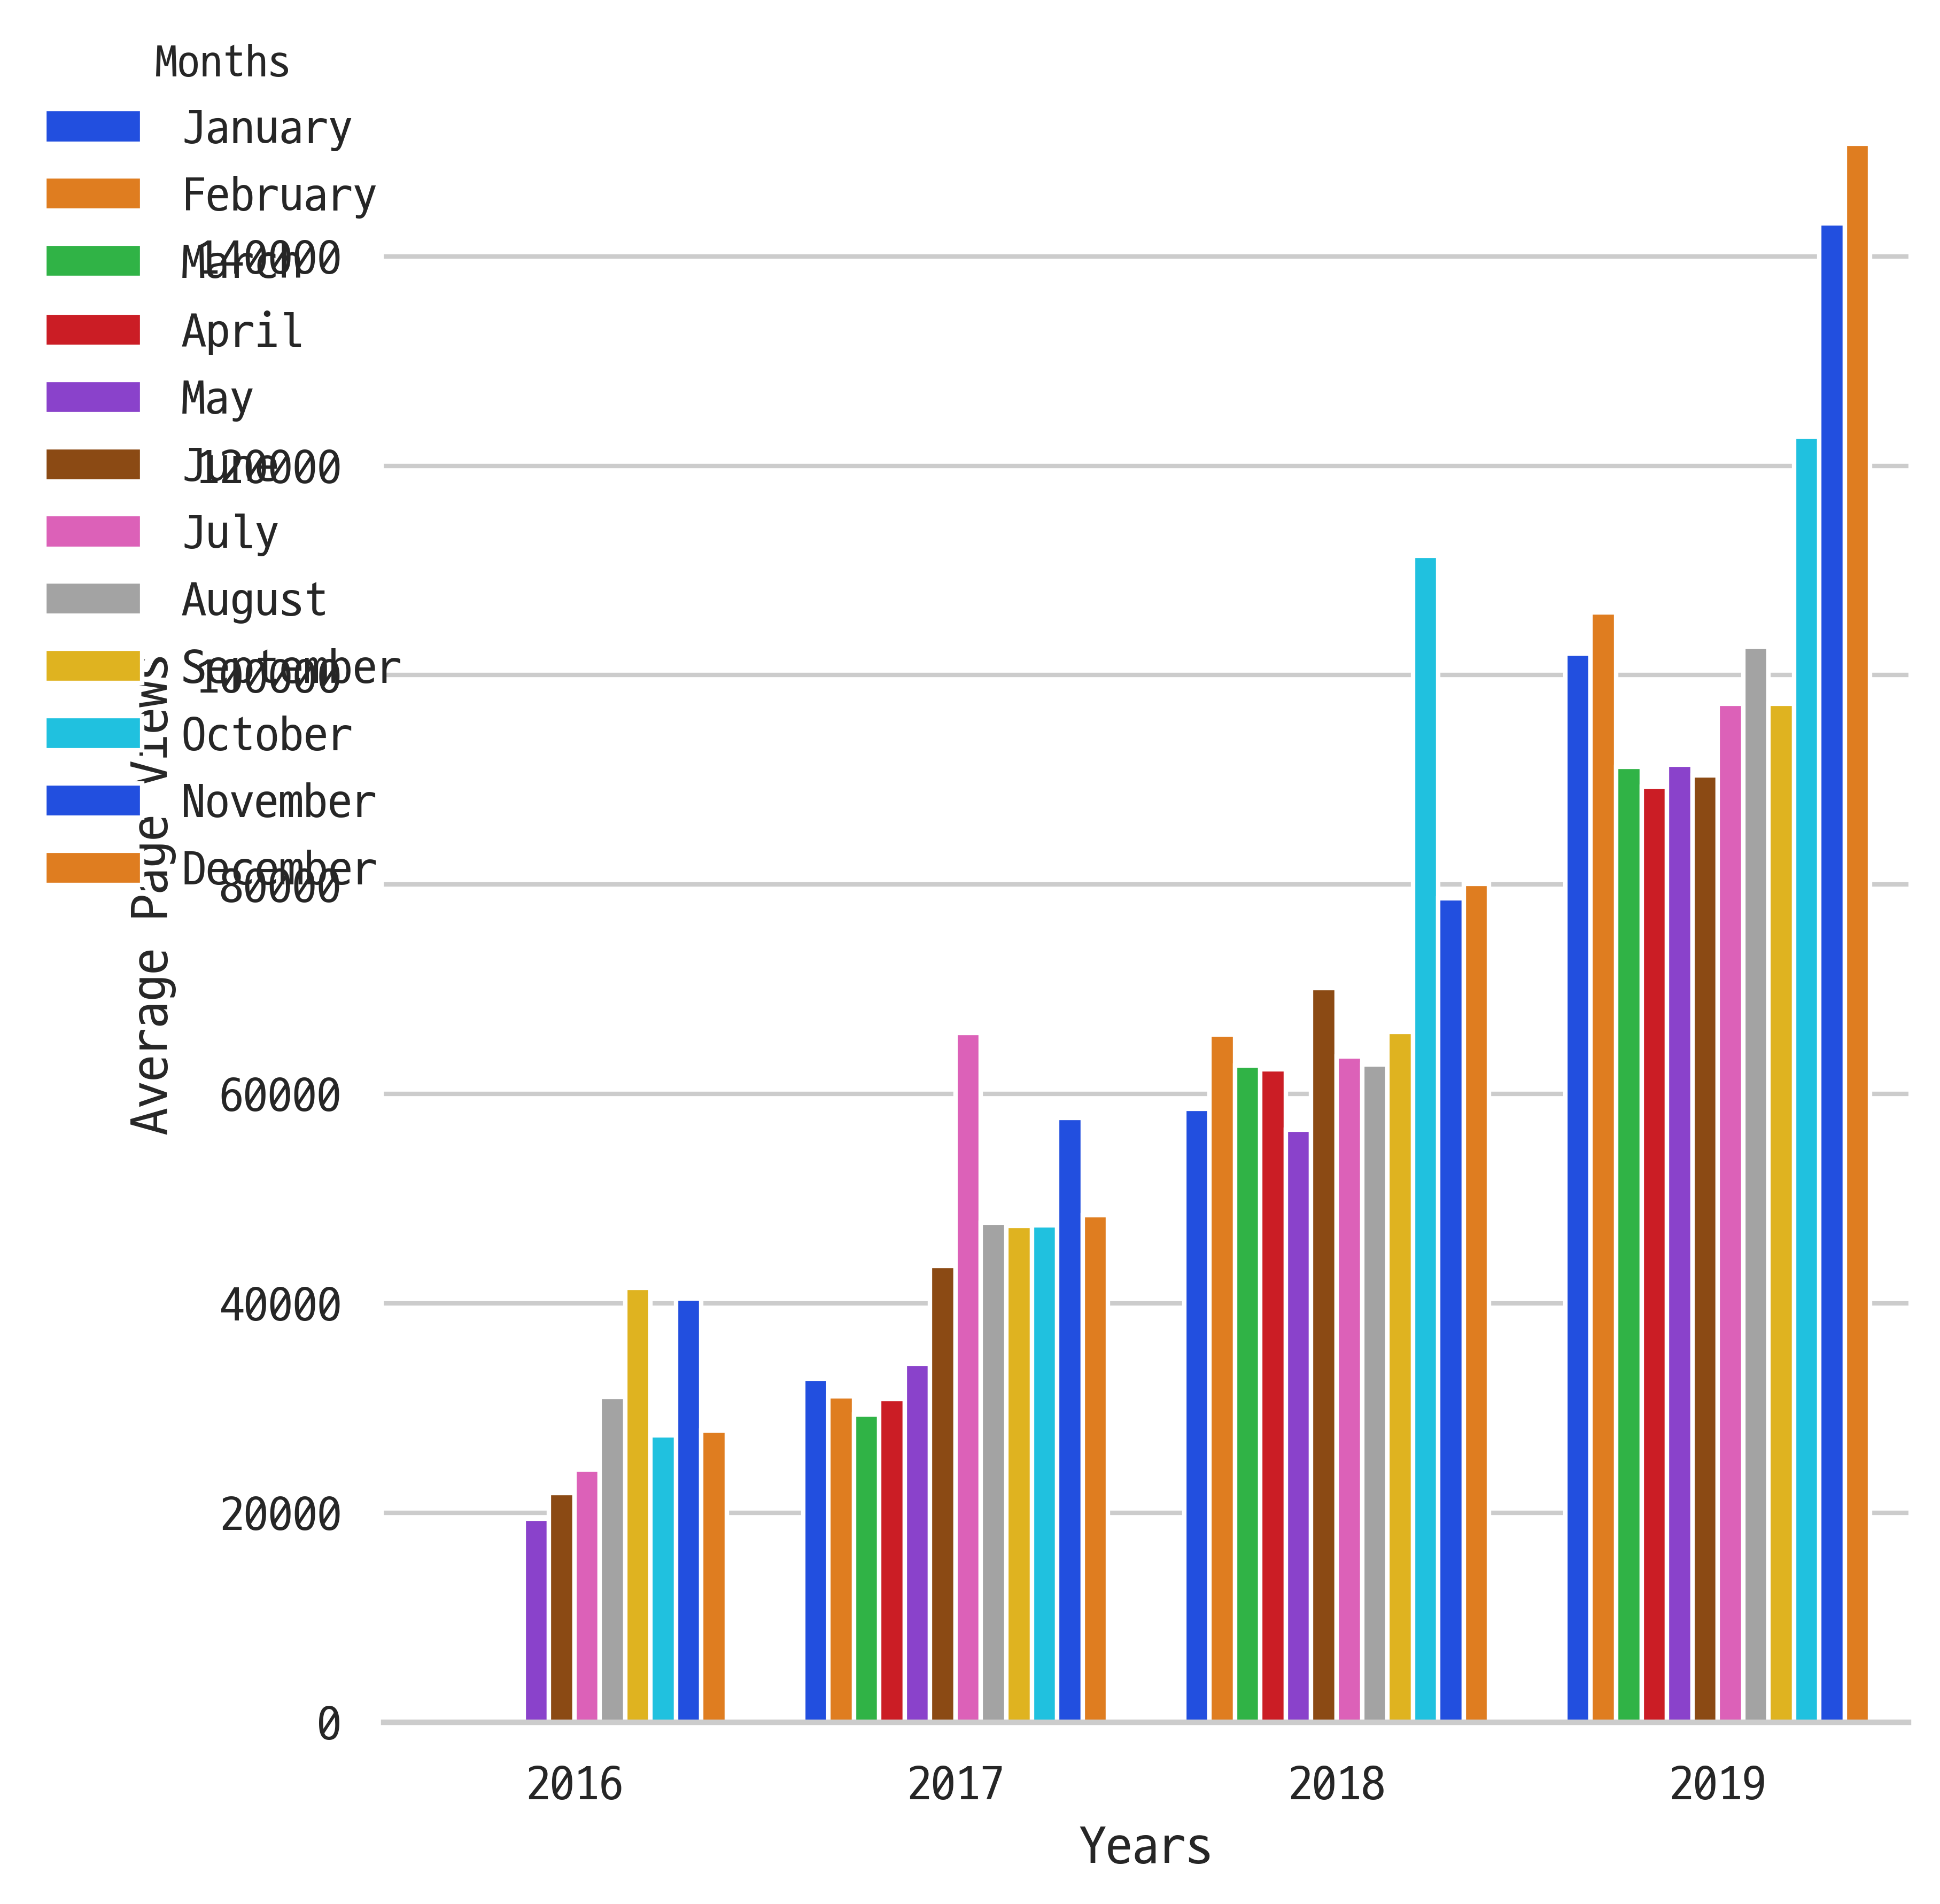

In [14]:
fig, ax = plt.subplots()
g = sns.catplot(x='year', y='value', hue='Months',
                hue_order=['January', 'February', 'March', 'April', 'May', 'June',
                           'July', 'August', 'September', 'October', 'November', 'December'],
                data= df_bar, kind= 'bar', height=6, palette='bright', legend=False)
g.despine(left=True, right=True)
g.set(xlabel = 'Years')
g.set(ylabel = 'Average Page Views')
g.add_legend(title = 'Months', loc='upper left', label_order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
# plt.legend(title='Months', loc='upper left', labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
fig = g.fig

In [15]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot similar to "examples/Figure_2.png". It should show average daily page views
    # for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label
    # on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
    df_bar = df_cleaned.groupby(by=[df_cleaned.index.year, df_cleaned.index.month]).mean()
    df_bar.index.names = ['year', 'month']
    df_bar.reset_index(inplace=True)
    df_bar['Months'] = df_bar['month'].apply(lambda x: calendar.month_name[x])

    # Draw bar plot 
    fig, ax = plt.subplots()
    sns.set_style("ticks")
    g = sns.catplot(x='year', y='value', hue='Months',
                    hue_order=['January', 'February', 'March', 'April', 'May', 'June',
                               'July', 'August', 'September', 'October', 'November', 'December'], 
                    data= df_bar, kind= 'bar', height=6, palette='bright', legend_out=False)
    g.set(xlabel = 'Years')
    g.set(ylabel = 'Average Page Views')
    g.add_legend(title = 'Months', loc='upper left', label_order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
    fig = g.fig

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

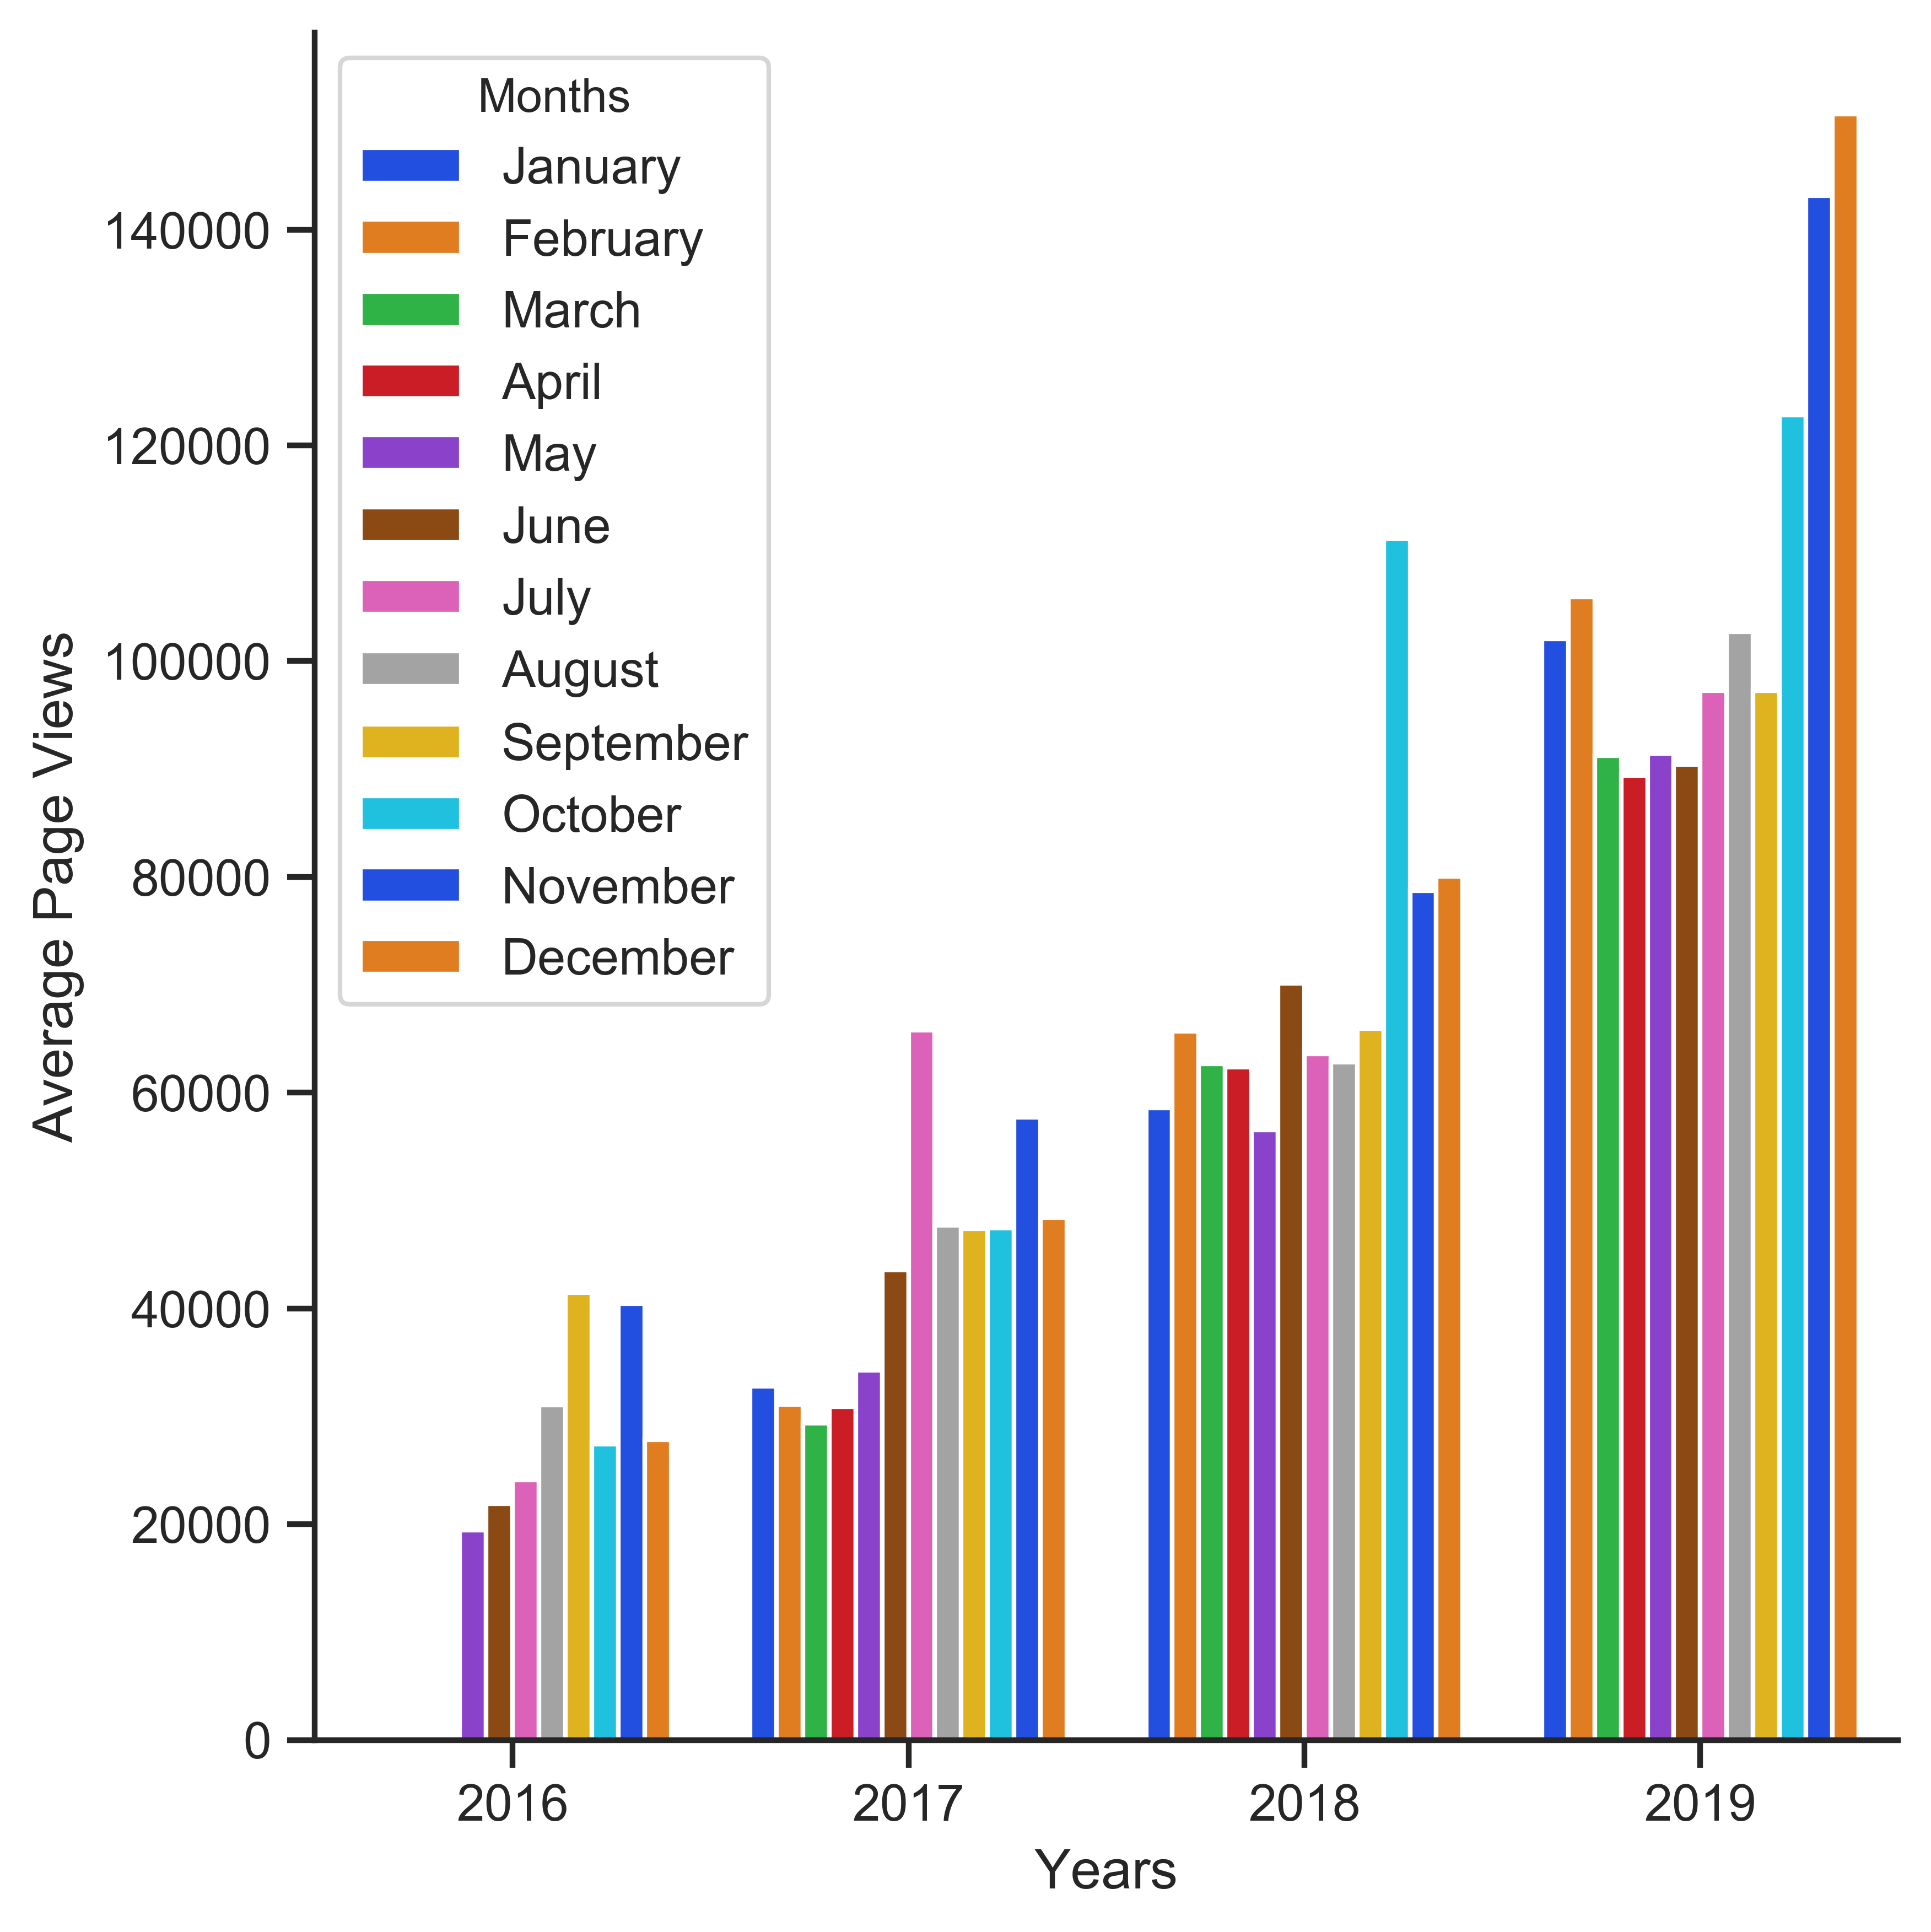

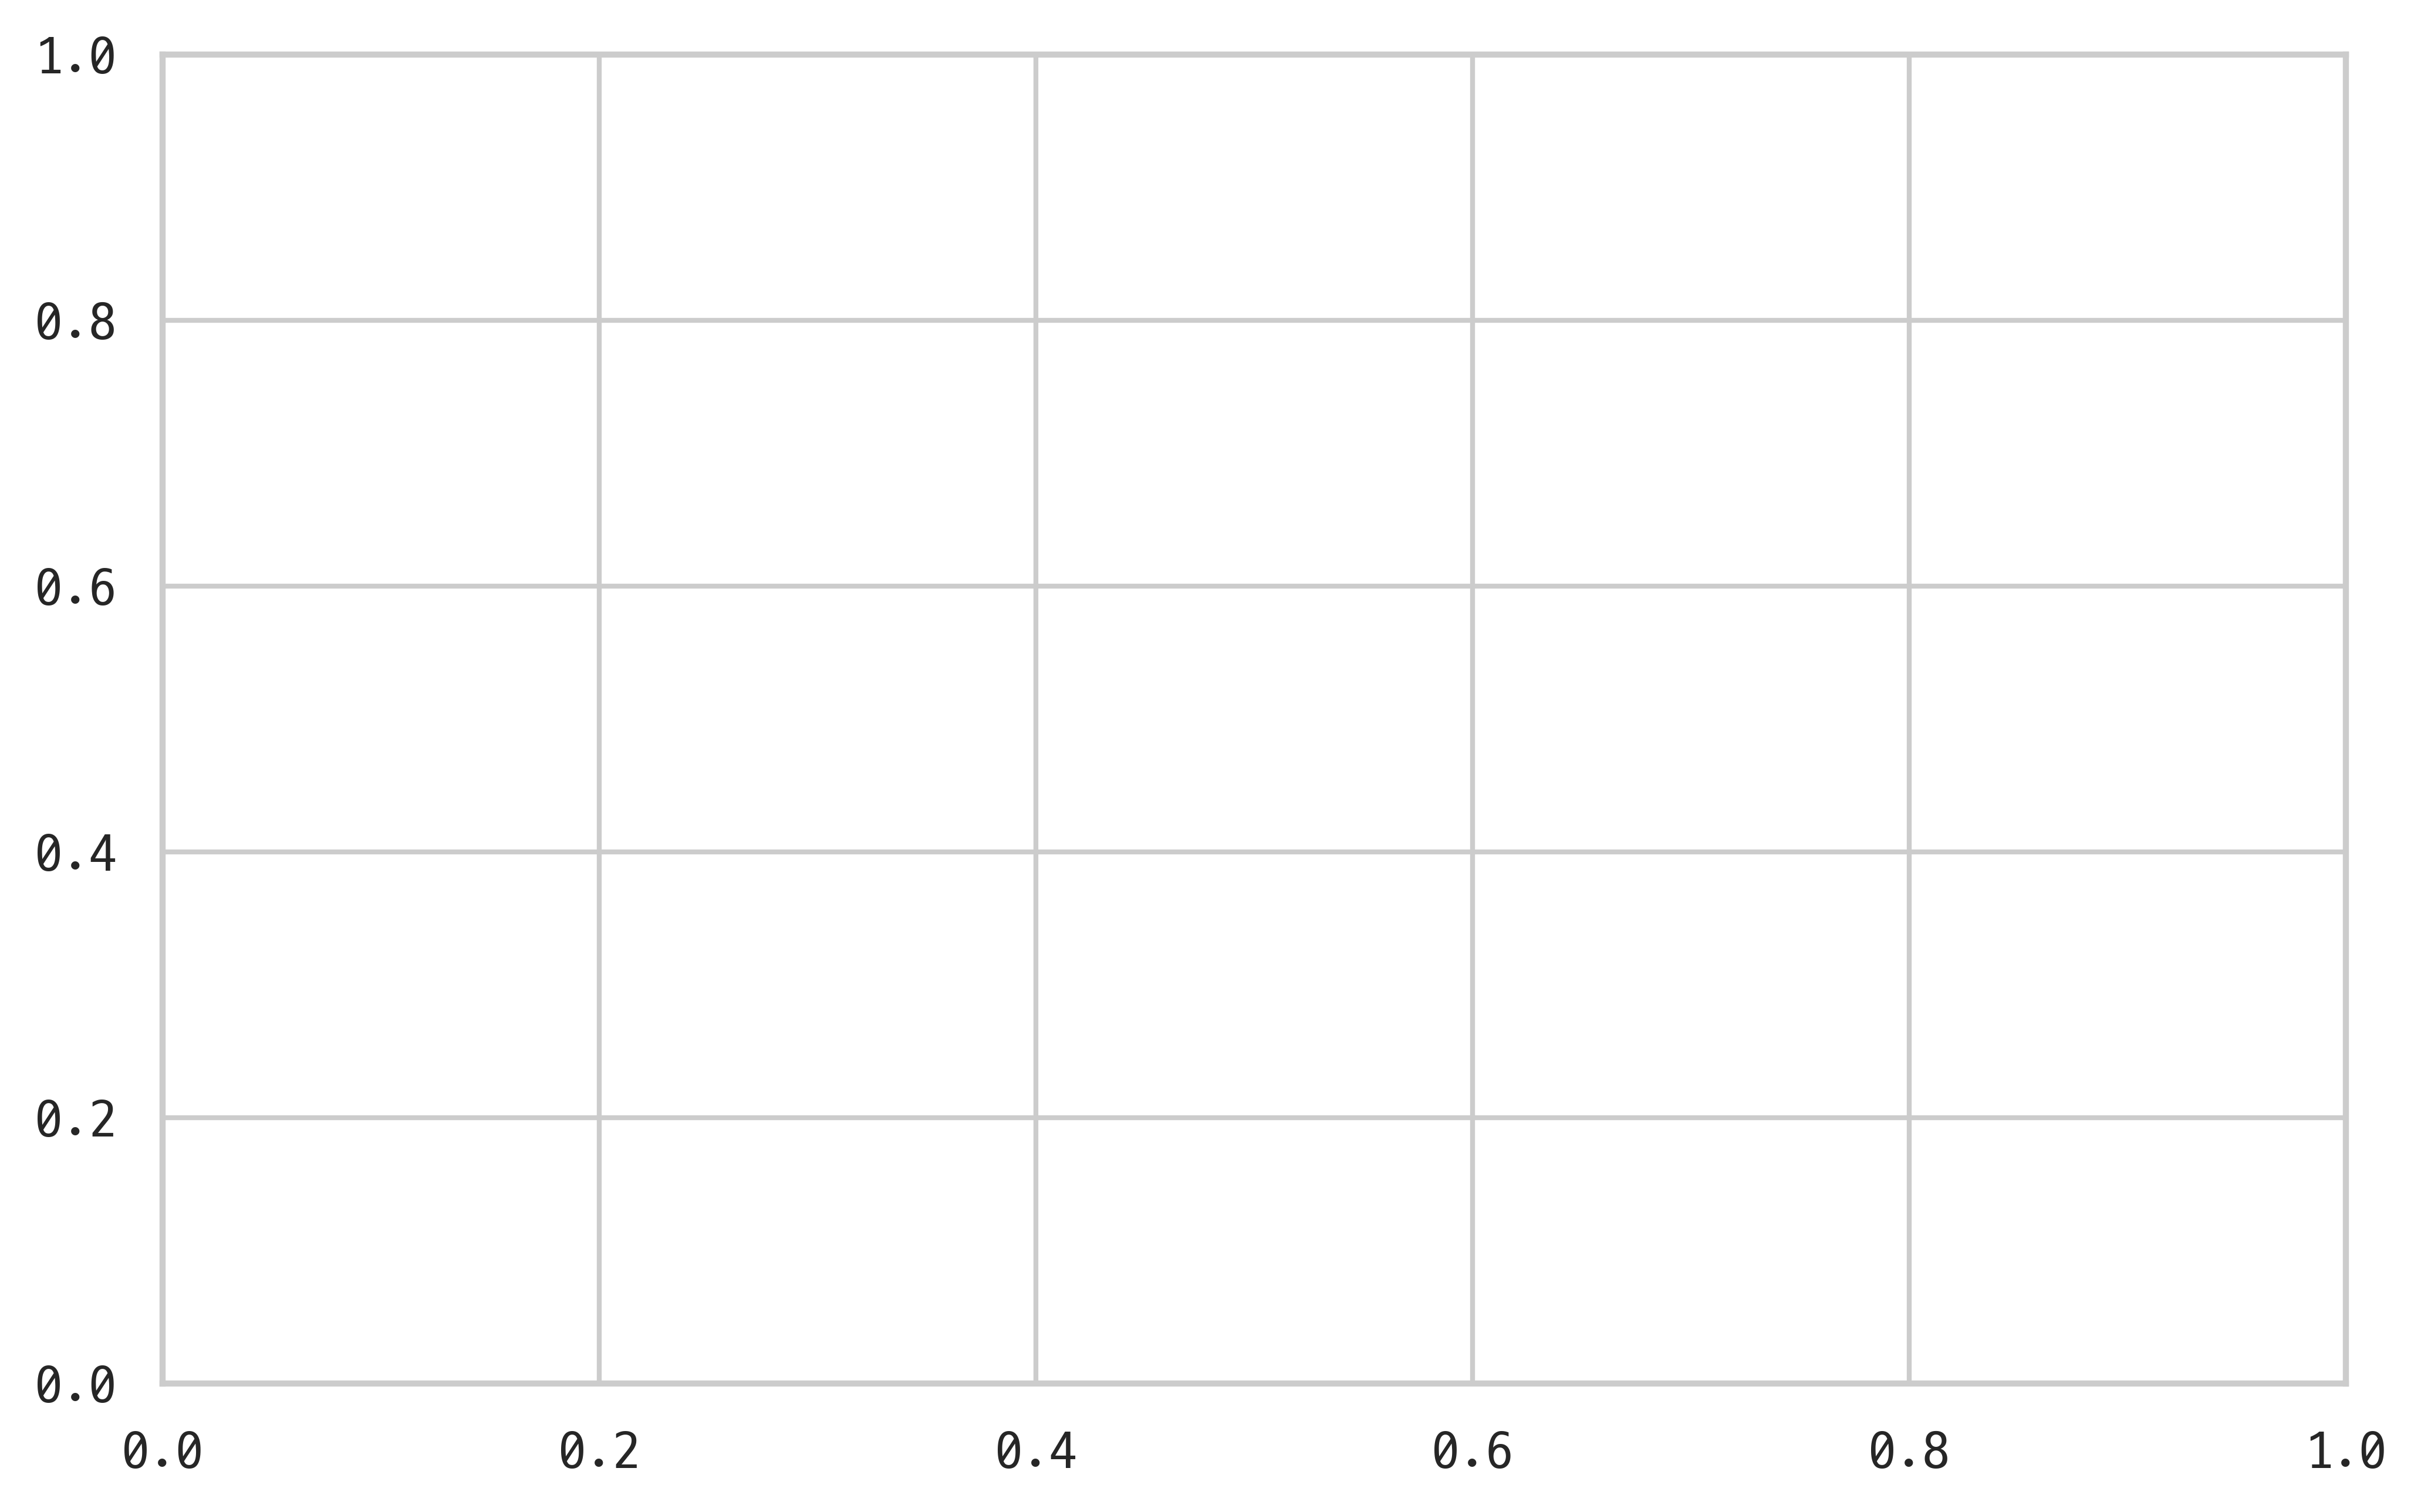

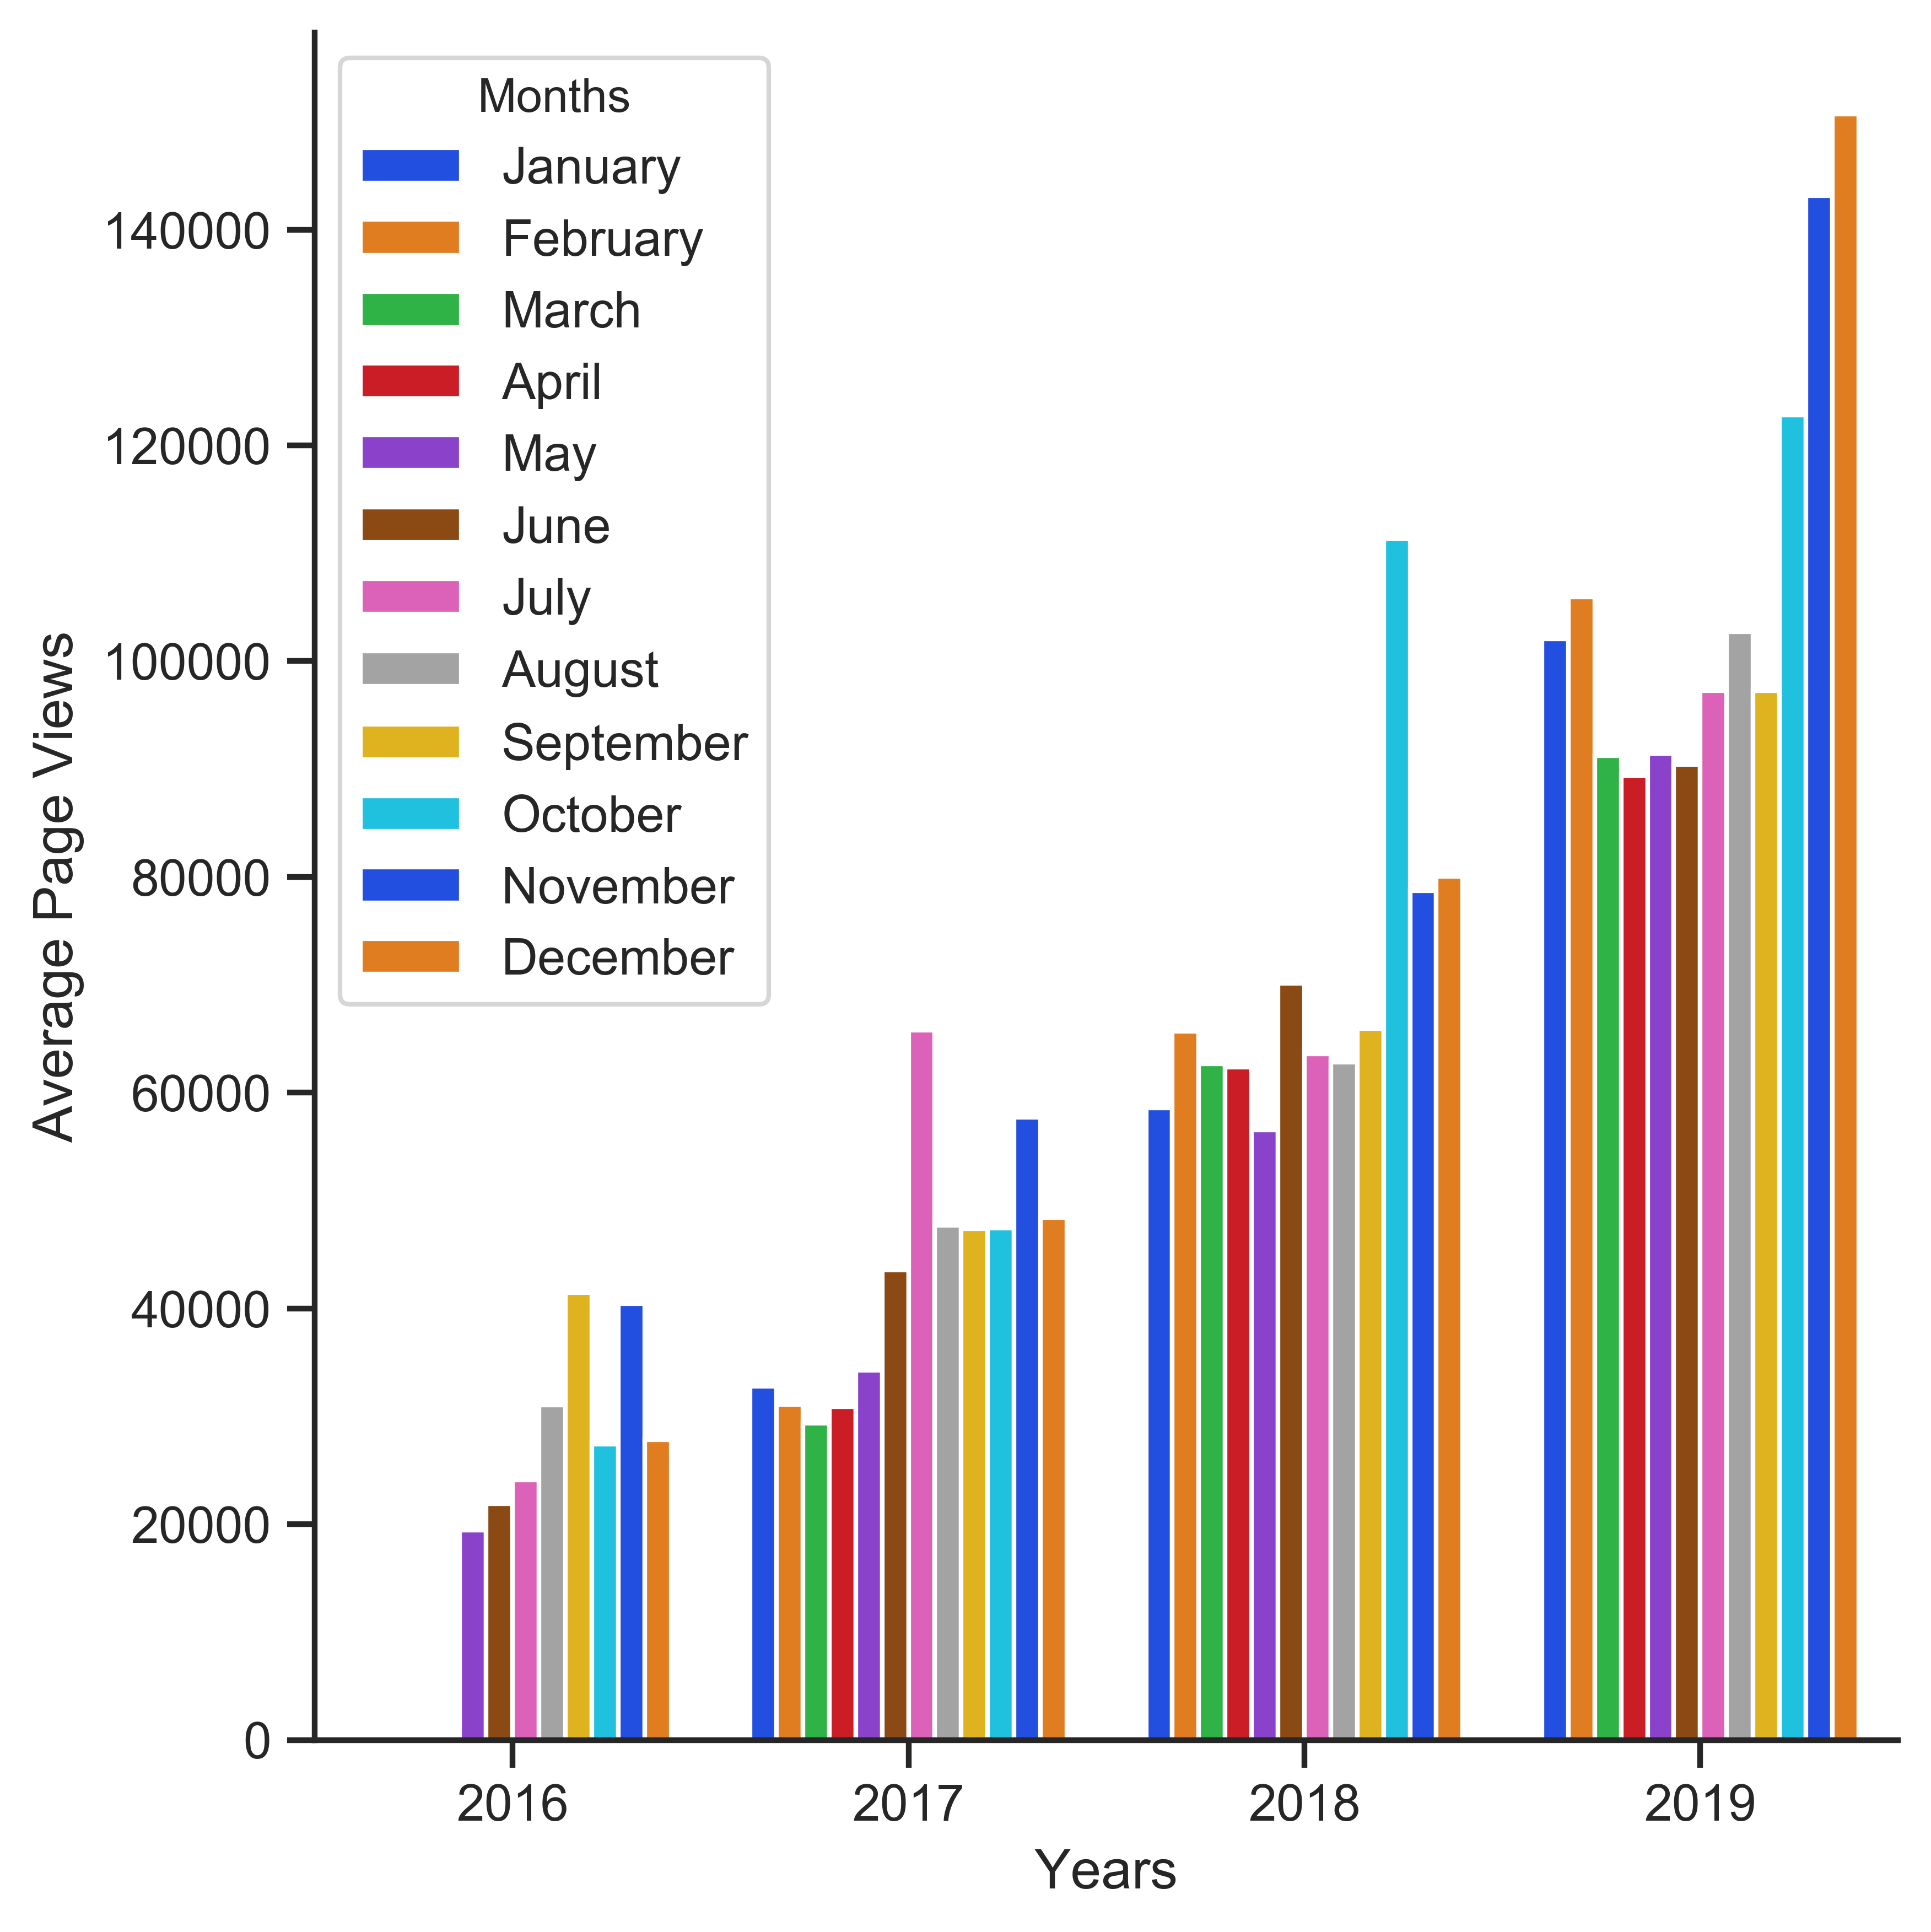

In [16]:
draw_bar_plot()

In [41]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df_cleaned.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn) similar to "examples/Figure_3.png". These box plots should show how the values are distributed
    # within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)"
    # and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at
    # "Jan" and the x and x axis are labeled correctly.
    sns.set_style("ticks")
    fig, ax = plt.subplots(figsize=(20, 10), ncols=2)
    g1 = sns.boxplot(x='year', y='value', data=df_box, palette='bright', ax=ax[0])
    g1.set(xlabel='Year', ylabel='Page Views', ylim=[20000, 180000], title='Year-wise Box Plot (Trend)')
    g2 = sns.boxplot(x='month', y='value', data=df_box, palette='pastel', ax=ax[1], order=
                     ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    g2.set(xlabel= 'Month', ylabel= 'Page Views', ylim=[20000, 180000], title='Month-wise Box Plot (Seasonality)')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

In [42]:
draw_box_plot()